In [95]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [96]:
cases = read_file(r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4b.pkl")
casenames = cases.keys()
print(casenames)

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4b.pkl loaded
dict_keys(['c4e-c4a_solver_improvements'])


In [2]:
cases = dict()

In [24]:
del cases["zb0-base"]

In [3]:
db = CaseDB(case_dir = r"C:\Users\mikek\OneDrive\Project\collab\tech\cases")

casenames = [
    "c4e-c4a_solver_improvements"
    ]

print(f"Loading:")
for name in casenames:
    
    if name not in cases.keys():
        print(f"\n{name}...")
        cases[name] = Load.case_2D(db.casepaths[name], gridfilepath = db.gridpaths["g3a5-fatter.nc"], keep_boundaries = False)
    else:
        print(f"Skipping {name}...")
    


Loading:

c4e-c4a_solver_improvements...
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


In [4]:
write_file(cases, r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4b.pkl")

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4b.pkl written


In [133]:
%matplotlib qt

In [127]:
%matplotlib inline

In [140]:
case = cases["c4e-c4a_solver_improvements"]
case = casenorm

fig, ax = plt.subplots(figsize=(6,6), dpi = 150)

# anim = xbout.plotting.animate.animate_poloidal(case.ds["NVd+"], ax = ax, cmap = "bwr",  color = "k", lw = 0, logscale = False, vmin = -1e-5, vmax = 1e-5)
anim = xbout.plotting.animate.animate_poloidal(abs(case.ds["ddt(Pd+)"]), ax = ax, 
                                               cmap = "Spectral_r",  color = "k", lw = 0.1, logscale = False, 
                                            #    vmin = 1.8e4, vmax = 1.9e4,
                                               vmin = None, vmax = 1200,
                                               )
# abs(data).bout.pcolormesh(ax = ax, cmap = "Spectral_r",  color = "k", lw = 0, logscale = True, vmin = None, vmax = None)

ax.set_xlim(0.4, 0.55)
ax.set_ylim(-0.45, -0.34)
print()

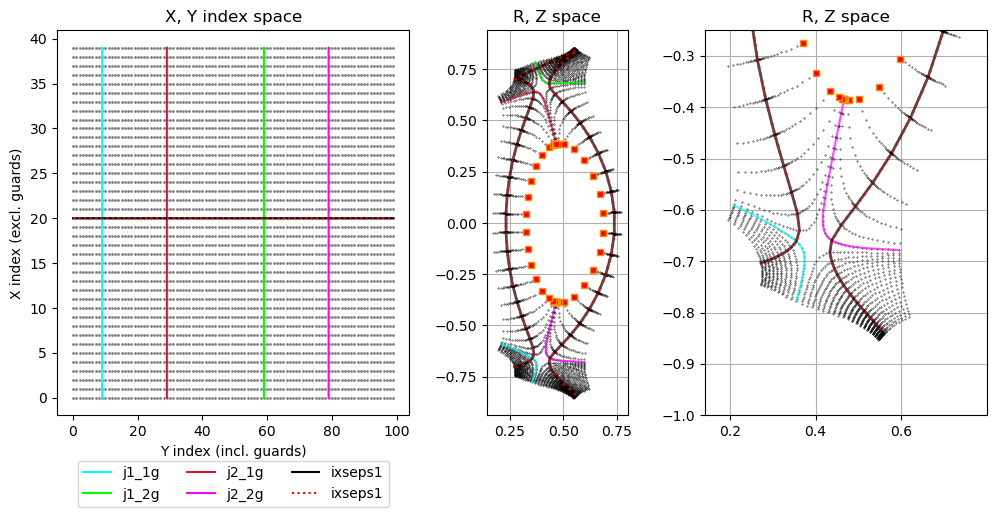

In [162]:
plot_selection(case, core)

In [169]:
core = case.select_custom_core_ring(0)
# plot_selection(case, core)
core["ddt(Pd+)"].isel(t=[-100, -50, -1]).plot.line(x = "theta")

ValueError: Line plots are for 1- or 2-dimensional DataArrays. Passed DataArray has 3 dimensions

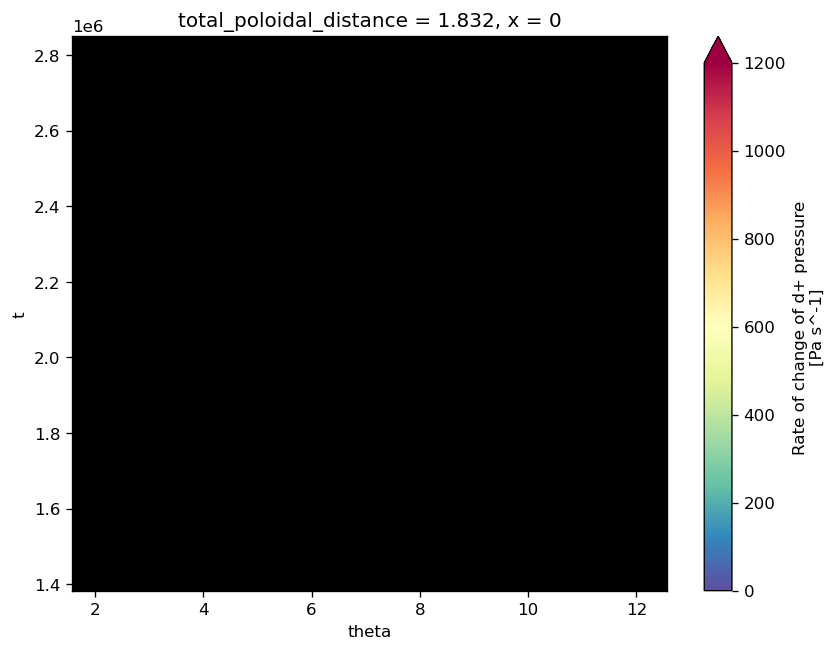

In [166]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 120)
abs(core["ddt(Pd+)"]).sortby("theta").plot(ax = ax, vmin = 0, vmax = 1200, cmap = "Spectral_r", lw = 0.01, color = "k")

In [161]:
abs(casenorm.ds["theta"]).bout.pcolormesh(ax = ax, cmap = "Spectral_r",  color = "k", lw = 0, logscale = True, vmin = None, vmax = None)

ValueError: da must be 2D (x,y)

In [144]:
%matplotlib inline

In [ ]:
abs(data).bout.pcolormesh(ax = ax, cmap = "Spectral_r",  color = "k", lw = 0, logscale = True, vmin = None, vmax = None)

In [ ]:
ds = xbout.load.open_boutdataset(
                datapath = datapath, 
                inputfilepath = inputfilepath, 
                gridfilepath = gridfilepath,
                info = False,
                cache = False,
                geometry = "toroidal",
                keep_xboundaries=False,
                keep_yboundaries=False,
                )

# Load case without unnormalising

In [2]:
db = CaseDB(case_dir = r"C:\Users\mikek\OneDrive\Project\collab\tech\cases")
casenorm = Load.case_2D(db.casepaths["c4e-c4a_solver_improvements"], 
                        gridfilepath = db.gridpaths["g3a5-fatter.nc"], 
                        keep_boundaries = False,
                        unnormalise = False)

Skipping unnormalisation
CHECK: Total domain volume is 1.556E+00 [m3]


In [30]:
%matplotlib inline

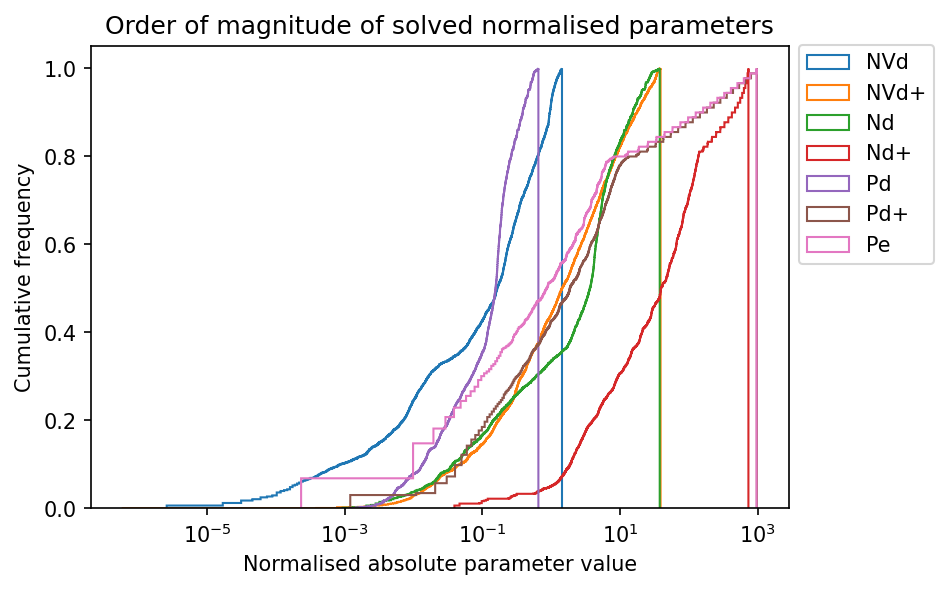

In [69]:
ds = casenorm.ds.isel(t=-1)

# for param in ["Ne", "Te"]:

data = ds["Ne"].values.flatten()


fig, ax = plt.subplots(figsize = (6,4), dpi = 150)    
bins = 100000

for param in ["NVd", "NVd+", "Nd", "Nd+", "Pd", "Pd+", "Pe"]:
    
    ax.hist(abs(ds[param]).values.flatten(), histtype = "step", cumulative = True, density=True, bins = bins, label = param, lw = 1)

# ax.set_yscale("log")
ax.set_xscale("log")
fig.legend(loc="upper left", bbox_to_anchor = (0.9,0.9))
ax.set_xlabel("Normalised absolute parameter value")
ax.set_ylabel("Cumulative frequency")
ax.set_title("Order of magnitude of solved normalised parameters")
print()

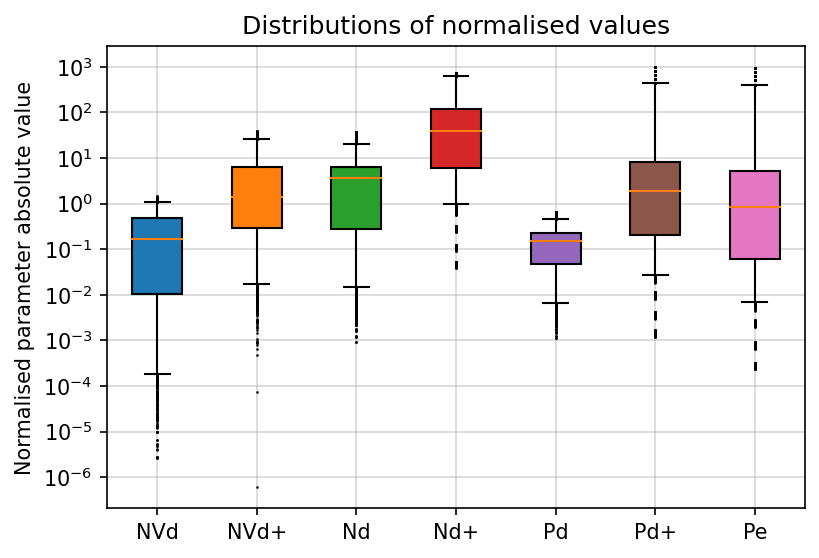

In [92]:
ds = casenorm.ds.isel(t=-1)

# for param in ["Ne", "Te"]:

data = ds["Ne"].values.flatten()


fig, ax = plt.subplots(figsize = (6,4), dpi = 150)    

# bins = 100000

toplot = []
params = ["NVd", "NVd+", "Nd", "Nd+", "Pd", "Pd+", "Pe"]
colors = [plt.get_cmap("tab10")(x) for x in range(len(params))]

for i, param in enumerate(params):
    toplot.append(abs(ds[param]).values.flatten())

bplot = ax.boxplot(toplot, labels = params, patch_artist = True, whis = (5, 95), flierprops = {"ms":1, "markerfacecolor":"k", "color":"grey", "mew":0.2})

for patch, color in zip(bplot["boxes"], colors):
    patch.set_facecolor(color)
    
#     ax.hist(abs(ds[param]).values.flatten(), histtype = "step", cumulative = True, density=True, bins = bins, label = param, lw = 2)

ax.set_yscale("log")
ax.grid(alpha=0.5)
ax.set_ylabel("Normalised parameter absolute value")
# ax.set_xscale("log")
# fig.legend(loc="upper left", bbox_to_anchor = (0.9,0.9))
# ax.set_xlabel("Normalised absolute parameter value")
# ax.set_ylabel("Cumulative frequency")
ax.set_title("Distributions of normalised values")

ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=15))
print()

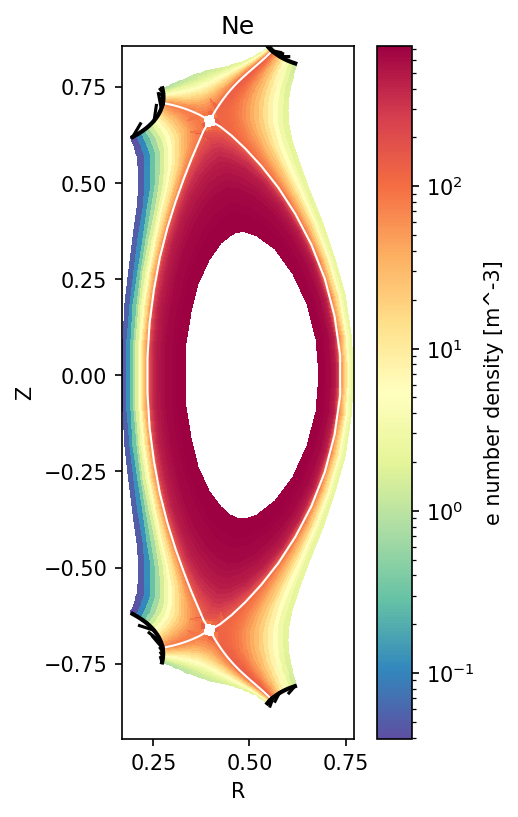

In [18]:
fig, ax = plt.subplots(figsize=(4,6), dpi = 150)

ds["Ne"].bout.pcolormesh(ax = ax, cmap = "Spectral_r",  color = "k", lw = 0, logscale = True, vmin = None, vmax = None)

In [16]:
case = cases["c4e-c4a_solver_improvements"]

fig, ax = plt.subplots(figsize=(10, 8), dpi = 150)

data = case.ds["ddt(Pd+)"]

rms = np.sqrt((data**2).sum("t") / len(data.coords["t"]))

abs(rms).bout.pcolormesh(ax = ax, cmap = "Spectral_r",  color = "k", lw = 0.1, logscale = True, vmin = None, vmax = None)

print()